<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/TP3_Aprendizaje_de_maquinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 3:

## Ejercicio 1:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Seleccionamos los datos para entrenar y verificar nuestros modelos, para generamos dataframes con distribuciones normales con distintos centroides y desvios tambien y distintas cantidades

In [2]:
# Semilla aletoria
np.random.seed(110198)
df1 = pd.DataFrame(np.random.normal(loc=45, scale=6, size=(50, 2)),columns=['x','y'])
df1['color'] = 'b'
df1['target']=1
df2 = pd.DataFrame(np.random.normal(loc=55, scale=7, size=(50, 2)),columns=['x','y'])
df2['color'] = 'r'
df2['target'] =2
df = pd.concat([df1,df2],ignore_index=True)

df1 = pd.DataFrame(np.random.normal(loc=40, scale=17, size=(100, 2)),columns=['x','y'])
df1['color'] = 'b'
df1['target']=1
df2 = pd.DataFrame(np.random.normal(loc=60, scale=20, size=(100, 2)),columns=['x','y'])
df2['color'] = 'r'
df2['target'] =2
df_2 = pd.concat([df1,df2],ignore_index=True)


Los visualizamos:

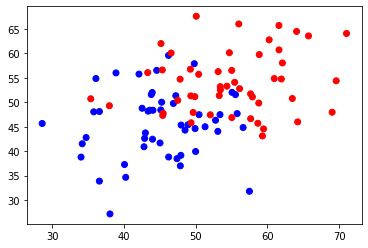

In [3]:
plt.scatter(df['x'],df['y'],c=df['color'])

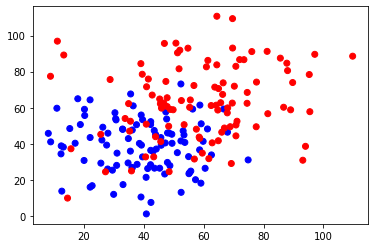

In [4]:
plt.scatter(df_2['x'],df_2['y'],c=df_2['color'])

Ahora entrenamos distintos modelos de K near neighbor con distintos k para probar distintos resultados, ambos entrenados con la mitad del dataset:

In [5]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], df['target'], test_size=0.5, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(df_2[['x','y']], df_2['target'], test_size=0.5, random_state=0)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knnn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knnn.fit(X_train,y_train)

knn2 = neighbors.KNeighborsClassifier(n_neighbors=3)
knnn2 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn2.fit(X2_train,y2_train)
knnn2.fit(X2_train,y2_train)

y_pred = knn.predict(X_test)
yy_pred = knnn.predict(X_test)
y2_pred = knn2.predict(X2_test)
yy2_pred = knnn2.predict(X2_test)

Mostramos primero resultados para el primer dataset

F-measure knn = 0.7843137254901961
F-measure knnn = 0.8679245283018868


Text(0.5, 0.98, 'Confusion Matrix knnn')

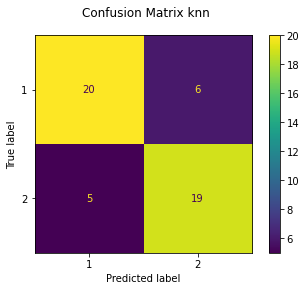

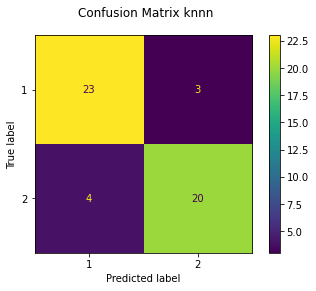

In [6]:
print("F-measure knn =",metrics.f1_score(y_test, y_pred))
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix knn")

print("F-measure knnn =",metrics.f1_score(y_test, yy_pred))
disp2 = metrics.plot_confusion_matrix(knnn, X_test, y_test)
disp2.figure_.suptitle("Confusion Matrix knnn")

Y luego resultados para el segundo:

F-measure knn2= 0.7450980392156863
F-measure knnn2= 0.7592592592592592


Text(0.5, 0.98, 'Confusion Matrix knnn2')

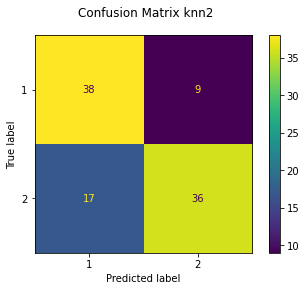

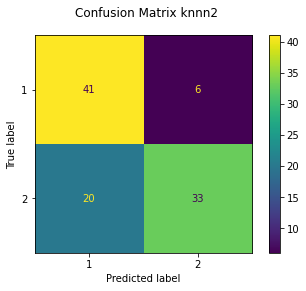

In [7]:
print("F-measure knn2=",metrics.f1_score(y2_test, y2_pred))
disp3 = metrics.plot_confusion_matrix(knn2, X2_test, y2_test)
disp3.figure_.suptitle("Confusion Matrix knn2")

print("F-measure knnn2=",metrics.f1_score(y2_test, yy2_pred))
disp4 = metrics.plot_confusion_matrix(knnn2, X2_test, y2_test)
disp4.figure_.suptitle("Confusion Matrix knnn2")

## Ejercicio 3

In [27]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Podemos observar que los datos se encuentran realmente muy mezclados

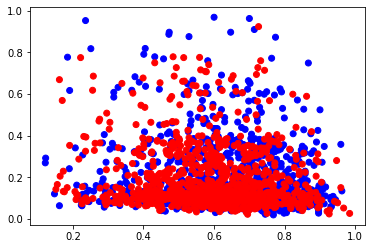

In [28]:
plt.scatter(attributes_spotify['danceability'],attributes_spotify['liveness'],c=['b' if x == 1 else 'r' for x in attributes_spotify['target']])

Nos quedamos con los atributos que creemos que puedan identificar las canciones y separamos los datos de entrenamiento y de verificacion

In [29]:
cols = ['instrumentalness','acousticness','danceability','energy','liveness','loudness','speechiness','valence']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(attributes_spotify[cols], attributes_spotify['target'], test_size=0.8, random_state=0)

Entrenamos el modelo y nos quedamos con un par de estimadores como la matriz de confusion y la F-measure. Probamos primero con N = 3

F-measure knn Spotify= 0.6054687499999999


Text(0.5, 0.98, 'Confusion Matrix knn')

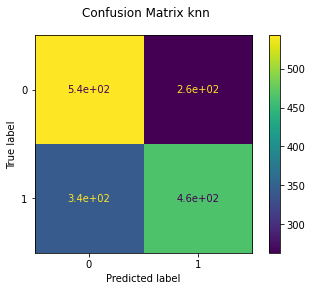

In [30]:
knspoti = neighbors.KNeighborsClassifier(n_neighbors=3)
knspoti.fit(Xs_train,ys_train)
ys_pred = knspoti.predict(Xs_test)

print("F-measure knn Spotify=",metrics.f1_score(ys_test, ys_pred))
disp = metrics.plot_confusion_matrix(knspoti, Xs_test, ys_test)
disp.figure_.suptitle("Confusion Matrix knn")

Con N = 5

F-measure knn Spotify= 0.6164199192462988


Text(0.5, 0.98, 'Confusion Matrix knn')

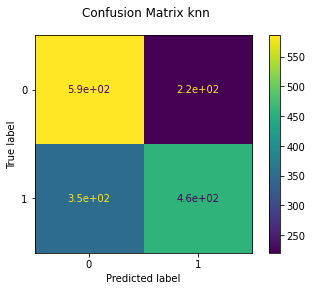

In [31]:
knspoti = neighbors.KNeighborsClassifier(n_neighbors=5)
knspoti.fit(Xs_train,ys_train)
ys_pred = knspoti.predict(Xs_test)

print("F-measure knn Spotify=",metrics.f1_score(ys_test, ys_pred))
disp = metrics.plot_confusion_matrix(knspoti, Xs_test, ys_test)
disp.figure_.suptitle("Confusion Matrix knn")

Con N = 1

F-measure knn Spotify= 0.6091307066916823


Text(0.5, 0.98, 'Confusion Matrix knn')

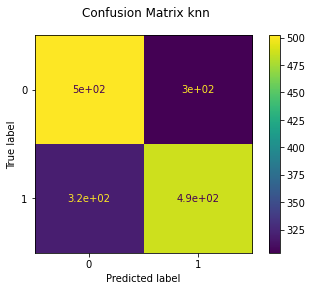

In [32]:
knspoti = neighbors.KNeighborsClassifier(n_neighbors=1)
knspoti.fit(Xs_train,ys_train)
ys_pred = knspoti.predict(Xs_test)

print("F-measure knn Spotify=",metrics.f1_score(ys_test, ys_pred))
disp = metrics.plot_confusion_matrix(knspoti, Xs_test, ys_test)
disp.figure_.suptitle("Confusion Matrix knn")

Concluimos que la cantidad de vecinos N no varia tanto en la eficiencia del modelo. En privado hice el mismo proceso cambiando el tamaño del dataset de entrenamiento, el resultado presento el mismo rango de precision(F = 0.6 +-0.07)

(Alerta spoiler del siguiente practico!) Con el modelo de support vector machine el resultado no se aleja de anterior

F-measure SVM = 0.6598802395209582


Text(0.5, 0.98, 'Confusion Matrix svm')

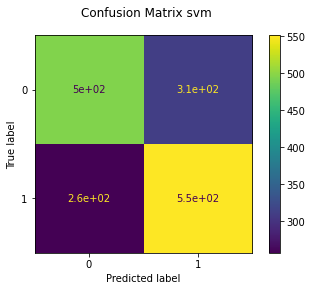

In [33]:
from sklearn import svm
from sklearn.model_selection import train_test_split

music = svm.SVC()
music.fit(Xs_train,ys_train)
ys_pred = music.predict(Xs_test)

print("F-measure SVM =",metrics.f1_score(ys_test, ys_pred))
disp = metrics.plot_confusion_matrix(music, Xs_test, ys_test)
disp.figure_.suptitle("Confusion Matrix svm")